In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("C:/Users/Yusuf/Desktop/proje/machine learning/car_data.xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Boya-değişen         1000 non-null   object
 1   Kasa Tipi            1000 non-null   object
 2   Kilometre            1000 non-null   object
 3   Kimden               1000 non-null   object
 4   Marka                1000 non-null   object
 5   Model                1000 non-null   object
 6   Motor Gücü           995 non-null    object
 7   Motor Hacmi          996 non-null    object
 8   Ort. Yakıt Tüketimi  903 non-null    object
 9   Renk                 1000 non-null   object
 10  Seri                 1000 non-null   object
 11  Takasa Uygun         881 non-null    object
 12  Vites Tipi           1000 non-null   object
 13  Yakıt Deposu         962 non-null    object
 14  Yakıt Tipi           1000 non-null   object
 15  Yıl                  1000 non-null   int64 
 16  Çekiş  

In [4]:
data = data.drop(['Kimden','Motor Hacmi','Ort. Yakıt Tüketimi','Takasa Uygun','Yakıt Deposu','Çekiş','İlan No','İlan Tarihi'], axis=1)

In [5]:
data.columns

Index(['Boya-değişen', 'Kasa Tipi', 'Kilometre', 'Marka', 'Model',
       'Motor Gücü', 'Renk', 'Seri', 'Vites Tipi', 'Yakıt Tipi', 'Yıl', 'Url',
       'Fiyat'],
      dtype='object')

In [6]:
data.head(10)

,Boya-değişen,Kasa Tipi,Kilometre,Marka,Model,Motor Gücü,Renk,Seri,Vites Tipi,Yakıt Tipi,Yıl,Url,Fiyat
0,3 boyalı,Hatchback/5,89.000 km,Ford,1.5 TDCi Trend X,75 hp,Beyaz,Fiesta,Düz,Dizel,2015,https://www.arabam.com/ilan/galeriden-satilik-...,615.000 TL
1,"1 değişen, 4 boyalı",Sedan,320.000 km,Nissan,1.6 SLX,100 hp,Beyaz,Primera,Düz,LPG & Benzin,1997,https://www.arabam.com/ilan/galeriden-satilik-...,335.000 TL
2,Belirtilmemiş,Sedan,209.000 km,Fiat,1.3 Multijet Urban,95 hp,Beyaz,Egea,Düz,Dizel,2016,https://www.arabam.com/ilan/galeriden-satilik-...,560.000 TL
3,Tamamı orjinal,Sedan,60.000 km,Hyundai,1.4 Team,97 hp,Beyaz,Accent Era,Düz,LPG & Benzin,2011,https://www.arabam.com/ilan/galeriden-satilik-...,590.000 TL
4,Tamamı orjinal,Hatchback/5,47.000 km,Renault,1.2 Joy,75 hp,Beyaz,Clio,Düz,Benzin,2018,https://www.arabam.com/ilan/galeriden-satilik-...,589.900 TL
5,"2 değişen, 3 boyalı",Hatchback/5,145.000 km,Opel,1.3 CDTI Essentia,75 hp,Beyaz,Corsa,Düz,Dizel,2011,https://www.arabam.com/ilan/galeriden-satilik-...,475.000 TL
6,2 boyalı,Hatchback/5,140.000 km,Fiat,1.3 Multijet Easy Plus,95 hp,Beyaz,Egea,Düz,Dizel,2019,https://www.arabam.com/ilan/galeriden-satilik-...,549.900 TL
7,Tamamı orjinal,Sedan,35.000 km,Renault,1.5 Blue DCI Joy Comfort,115 hp,Beyaz,Megane,Yarı Otomatik,Dizel,2021,https://www.arabam.com/ilan/galeriden-satilik-...,999.000 TL
8,Belirtilmemiş,Station wagon,200.000 km,Tofaş,SLX,83 hp,Bordo,Kartal,Düz,LPG & Benzin,1994,https://www.arabam.com/ilan/galeriden-satilik-...,150.000 TL
9,Tamamı orjinal,Sedan,190.000 km,Chevrolet,1.6 LS Plus,124 hp,Beyaz,Cruze,Otomatik,LPG & Benzin,2011,https://www.arabam.com/ilan/galeriden-satilik-...,555.000 TL


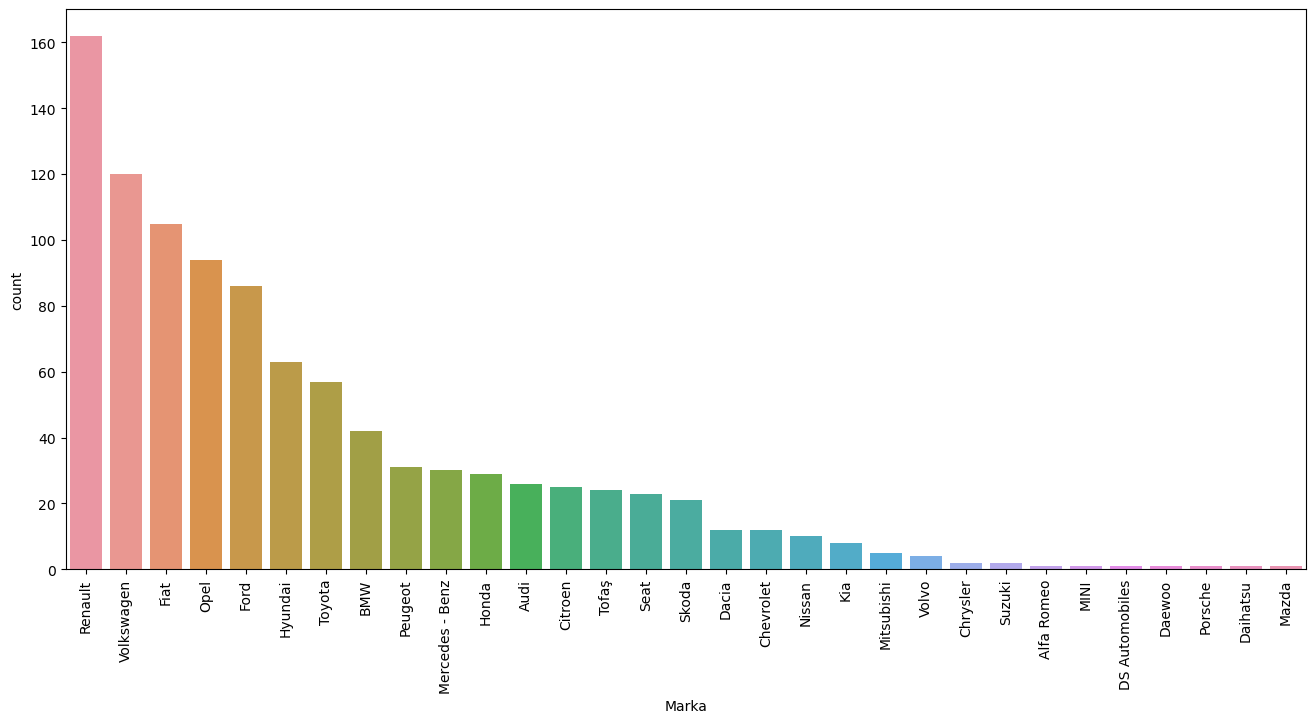

In [7]:
plt.figure(figsize=(16,16))
plt.subplot(2,1,1)
sns.countplot(x='Marka',data = data,order = data['Marka'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [8]:
data["Fiyat"] = data.Fiyat.str.replace('.', '')
data["Fiyat"] = data.Fiyat.str.replace(' TL', '')

In [9]:
data["Fiyat"] = data.Fiyat.astype(float)

In [10]:
data["Fiyat"]

0      615000.0
1      335000.0
2      560000.0
3      590000.0
4      589900.0
         ...   
995    410000.0
996    783000.0
997    380500.0
998    480000.0
999    520000.0
Name: Fiyat, Length: 1000, dtype: float64

In [11]:
data = data.rename(columns = {'Boya-değişen':'Boya_Degisen','Kasa Tipi':'Kasa_Tipi','Model':'Paket','Motor Gücü':'Motor_Gucu','Seri':'Model','Vites Tipi':'Vites_Tipi','Yakıt Tipi':'Yakit_Tipi','Yıl':'Yil'})

In [12]:
data["Boya_Degisen"] = data.Boya_Degisen.str.replace('Tamamı orjinal','0')
data["Boya_Degisen"] = data.Boya_Degisen.str.replace('Tamamı boyalı','14')
data["Boya_Degisen"] = data.Boya_Degisen.str.replace('Belirtilmemiş','0')
data["Boya_Degisen"] = data.Boya_Degisen.str.replace(' değişen','')
data["Boya_Degisen"] = data.Boya_Degisen.str.replace(' boyalı','')
data["Boya_Degisen"] = data.Boya_Degisen.str.replace(' ','')

In [13]:
def add_numbers(cell):
    numbers = [int(num) for num in cell.split(',')]
    return sum(numbers)

In [14]:
data["Boya_Degisen"] = data["Boya_Degisen"].apply(add_numbers)

In [15]:
data["Boya_Degisen"] = data.Boya_Degisen.astype(float)

In [16]:
data["Boya_Degisen"]

0      3.0
1      5.0
2      0.0
3      0.0
4      0.0
      ... 
995    0.0
996    0.0
997    2.0
998    7.0
999    4.0
Name: Boya_Degisen, Length: 1000, dtype: float64

In [17]:
data["Kilometre"] = data.Kilometre.str.replace('.', '')
data["Kilometre"] = data.Kilometre.str.replace(' km', '')

In [18]:
data["Kilometre"] = data.Kilometre.astype(float)

In [19]:
data["Kilometre"]

0       89000.0
1      320000.0
2      209000.0
3       60000.0
4       47000.0
         ...   
995    270000.0
996      7300.0
997    252000.0
998    250000.0
999       330.0
Name: Kilometre, Length: 1000, dtype: float64

In [20]:
data["Motor_Gucu"] = data.Motor_Gucu.str.replace(' hp', '')

In [21]:
mode_motorgucu = data["Motor_Gucu"].mode()[0]
data["Motor_Gucu"].fillna(mode_motorgucu, inplace=True)

In [22]:
data["Motor_Gucu"] = data.Motor_Gucu.astype(float)

In [23]:
data["Motor_Gucu"]

0       75.0
1      100.0
2       95.0
3       97.0
4       75.0
       ...  
995     80.0
996     95.0
997    105.0
998    115.0
999    115.0
Name: Motor_Gucu, Length: 1000, dtype: float64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Boya_Degisen  1000 non-null   float64
 1   Kasa_Tipi     1000 non-null   object 
 2   Kilometre     1000 non-null   float64
 3   Marka         1000 non-null   object 
 4   Paket         1000 non-null   object 
 5   Motor_Gucu    1000 non-null   float64
 6   Renk          1000 non-null   object 
 7   Model         1000 non-null   object 
 8   Vites_Tipi    1000 non-null   object 
 9   Yakit_Tipi    1000 non-null   object 
 10  Yil           1000 non-null   int64  
 11  Url           1000 non-null   object 
 12  Fiyat         1000 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [25]:
data.head(10)

,Boya_Degisen,Kasa_Tipi,Kilometre,Marka,Paket,Motor_Gucu,Renk,Model,Vites_Tipi,Yakit_Tipi,Yil,Url,Fiyat
0,3.0,Hatchback/5,89000.0,Ford,1.5 TDCi Trend X,75.0,Beyaz,Fiesta,Düz,Dizel,2015,https://www.arabam.com/ilan/galeriden-satilik-...,615000.0
1,5.0,Sedan,320000.0,Nissan,1.6 SLX,100.0,Beyaz,Primera,Düz,LPG & Benzin,1997,https://www.arabam.com/ilan/galeriden-satilik-...,335000.0
2,0.0,Sedan,209000.0,Fiat,1.3 Multijet Urban,95.0,Beyaz,Egea,Düz,Dizel,2016,https://www.arabam.com/ilan/galeriden-satilik-...,560000.0
3,0.0,Sedan,60000.0,Hyundai,1.4 Team,97.0,Beyaz,Accent Era,Düz,LPG & Benzin,2011,https://www.arabam.com/ilan/galeriden-satilik-...,590000.0
4,0.0,Hatchback/5,47000.0,Renault,1.2 Joy,75.0,Beyaz,Clio,Düz,Benzin,2018,https://www.arabam.com/ilan/galeriden-satilik-...,589900.0
5,5.0,Hatchback/5,145000.0,Opel,1.3 CDTI Essentia,75.0,Beyaz,Corsa,Düz,Dizel,2011,https://www.arabam.com/ilan/galeriden-satilik-...,475000.0
6,2.0,Hatchback/5,140000.0,Fiat,1.3 Multijet Easy Plus,95.0,Beyaz,Egea,Düz,Dizel,2019,https://www.arabam.com/ilan/galeriden-satilik-...,549900.0
7,0.0,Sedan,35000.0,Renault,1.5 Blue DCI Joy Comfort,115.0,Beyaz,Megane,Yarı Otomatik,Dizel,2021,https://www.arabam.com/ilan/galeriden-satilik-...,999000.0
8,0.0,Station wagon,200000.0,Tofaş,SLX,83.0,Bordo,Kartal,Düz,LPG & Benzin,1994,https://www.arabam.com/ilan/galeriden-satilik-...,150000.0
9,0.0,Sedan,190000.0,Chevrolet,1.6 LS Plus,124.0,Beyaz,Cruze,Otomatik,LPG & Benzin,2011,https://www.arabam.com/ilan/galeriden-satilik-...,555000.0
